In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,  Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler 
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv("./data/Synthetic_Data_For_Students.csv")
print("Dataset Shape:", df.shape)
display(df.head())
df.info()



Dataset Shape: (5000, 36)


,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Accident Date,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender
0,520.0,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-11-10 11:22:24.508901,2024-06-11 11:22:24.508901,13.0,33.0,4.0,Side collision at an intersection.,Whiplash and minor bruises.,Yes,Yes,Male
1,870.0,Rear end,B. 2 months,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2023-06-25 00:55:01.140228,2024-01-09 00:55:01.140228,4.0,45.0,2.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
2,2140.0,Other side pulled out of side road,G. 7 months,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-02-23 17:43:47.805561,2020-03-01 17:43:47.805561,9.0,45.0,4.0,Lost control on a snowy road.,Whiplash and minor bruises.,Yes,No,Female
3,520.0,Rear end - Clt pushed into next vehicle,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-02 04:36:32.118423,2021-10-13 04:36:32.118423,5.0,62.0,1.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
4,260.0,Rear end,C. 3 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-02 05:13:07.117423,2023-04-14 05:13:07.117423,9.0,78.0,1.0,Lost control on a snowy road.,Concussion and bruised ribs.,Yes,Yes,Other


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SettlementValue             4894 non-null   float64
 1   AccidentType                4878 non-null   object 
 2   Injury_Prognosis            4844 non-null   object 
 3   SpecialHealthExpenses       4870 non-null   float64
 4   SpecialReduction            4879 non-null   float64
 5   SpecialOverage              4883 non-null   float64
 6   GeneralRest                 4872 non-null   float64
 7   SpecialAdditionalInjury     4866 non-null   float64
 8   SpecialEarningsLoss         4872 non-null   float64
 9   SpecialUsageLoss            4870 non-null   float64
 10  SpecialMedications          4870 non-null   float64
 11  SpecialAssetDamage          4889 non-null   float64
 12  SpecialRehabilitation       4884 non-null   float64
 13  SpecialFixes                4879 

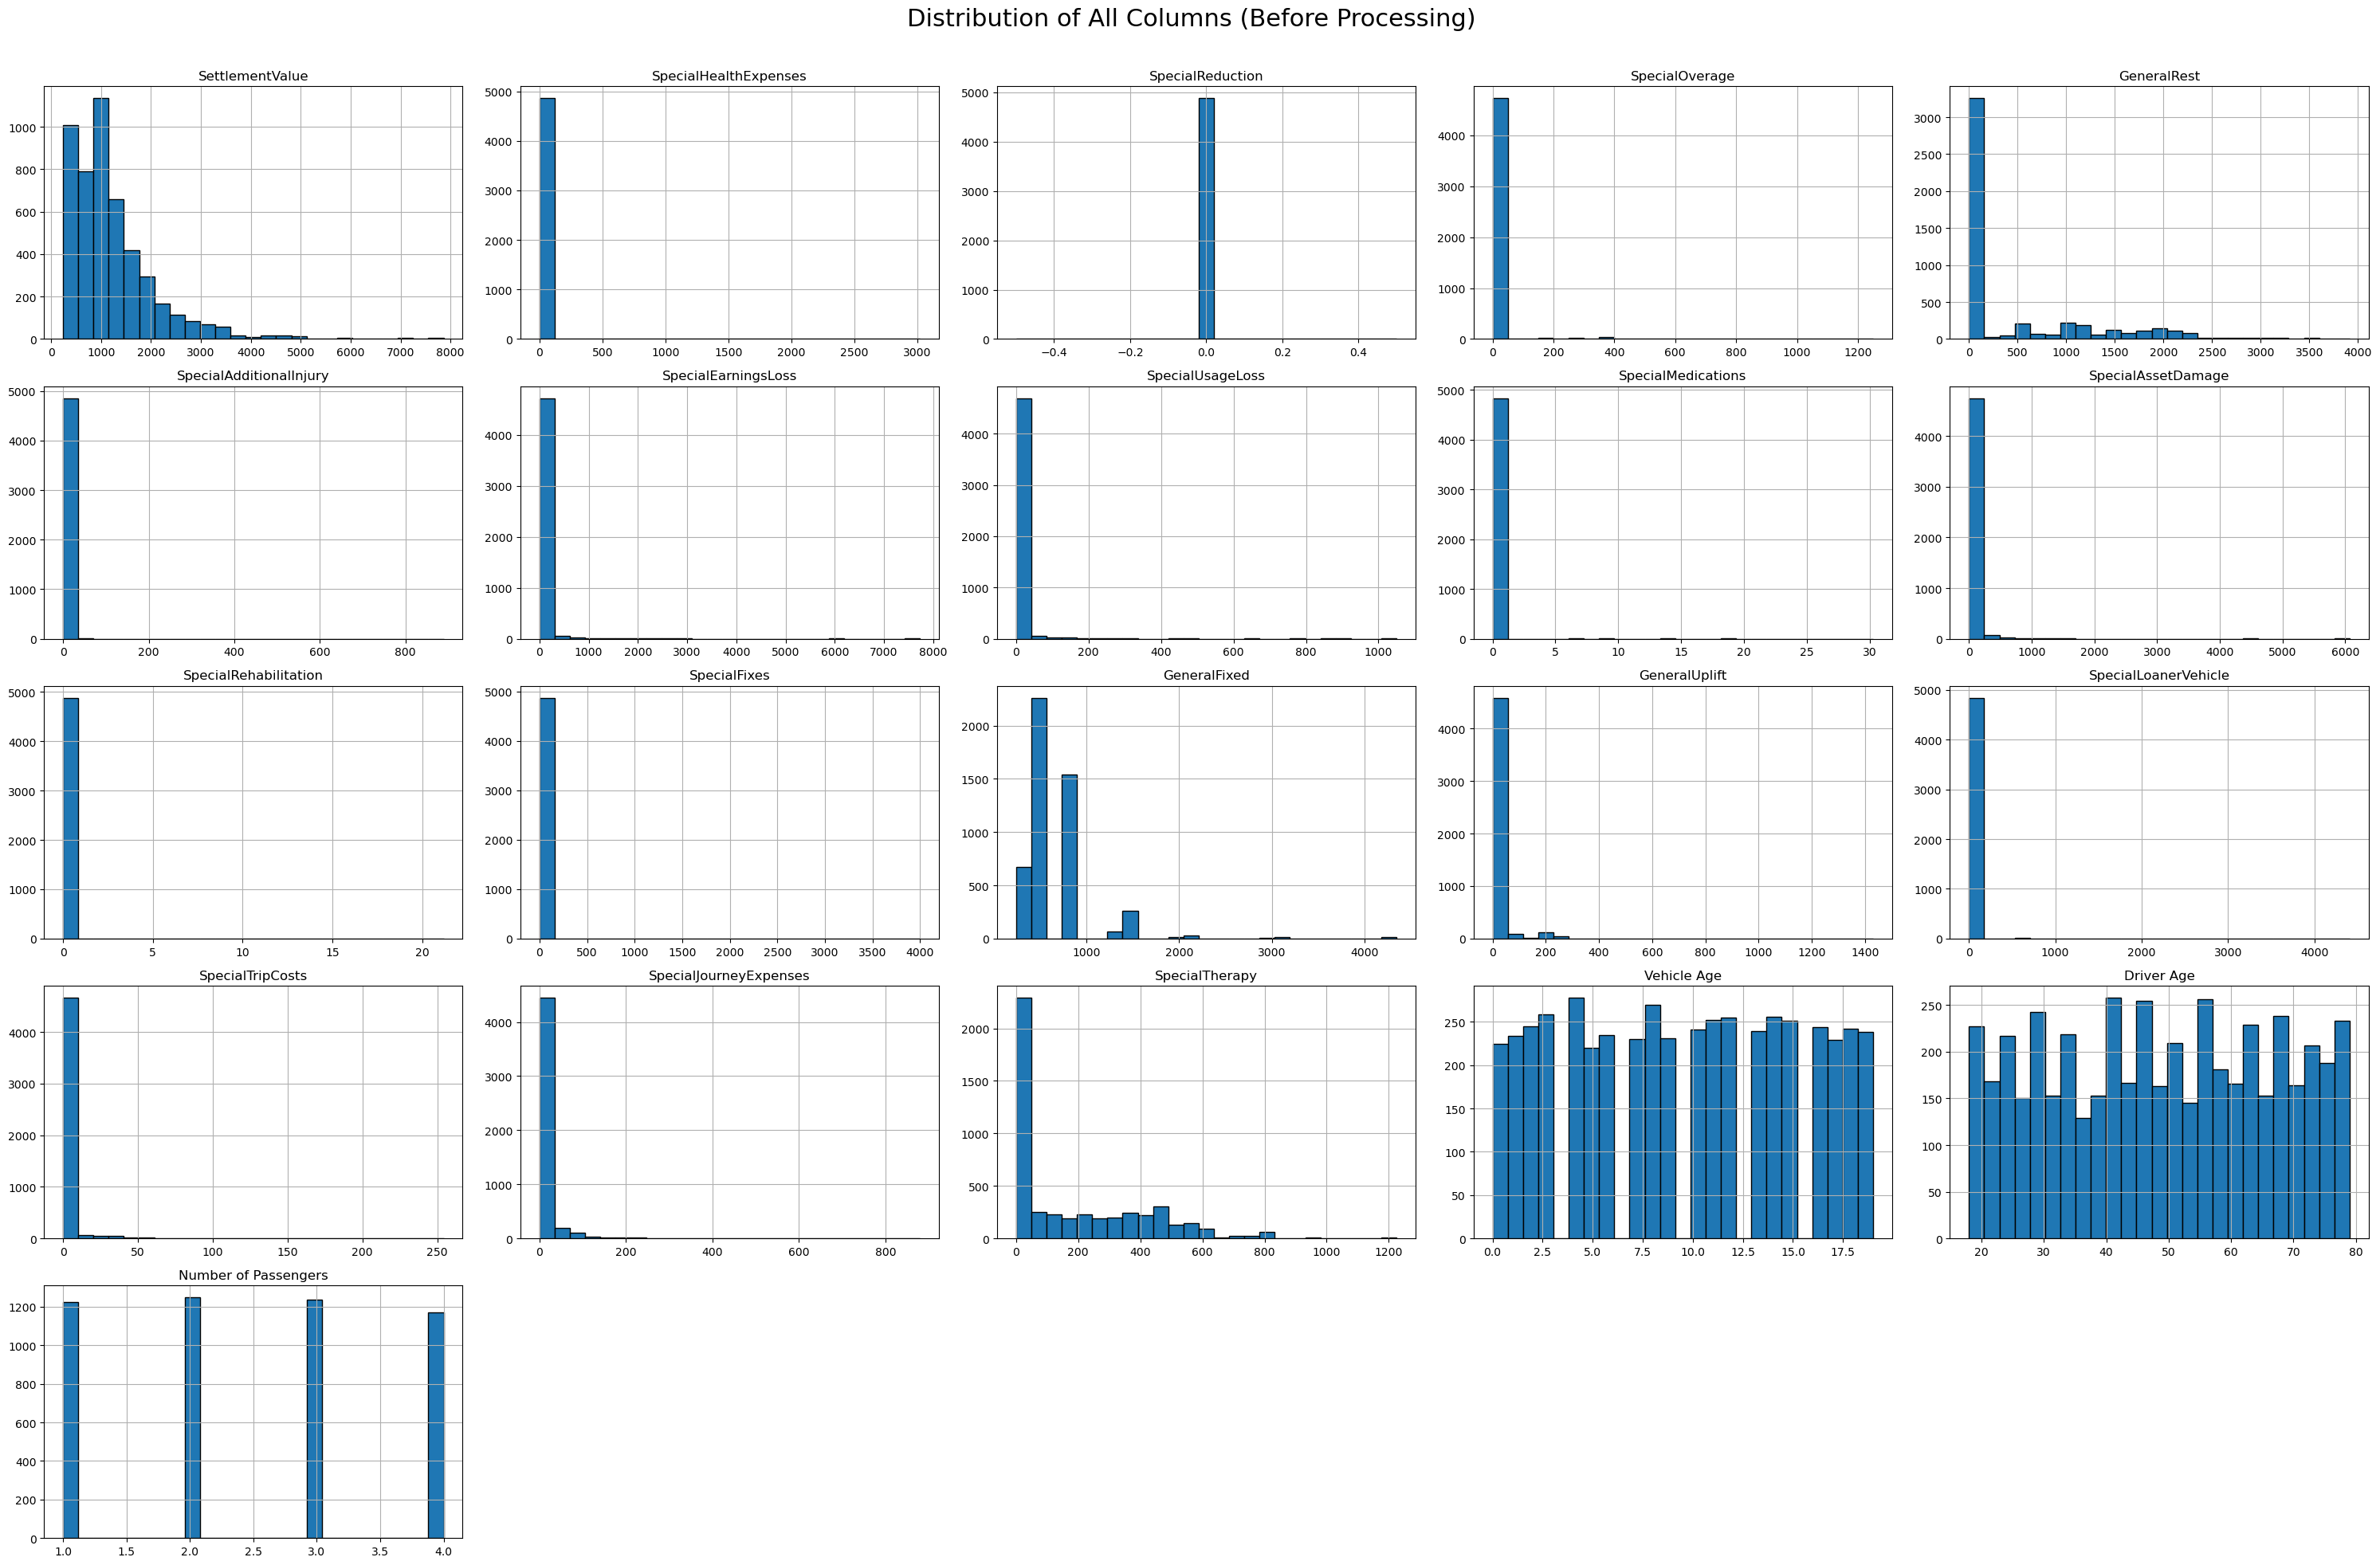

In [3]:
import matplotlib.pyplot as plt

# Plot histograms for all columns (numeric only)
df.hist(figsize=(30, 20), bins=25, edgecolor='black', color='#1f77b4')
plt.suptitle("Distribution of All Columns (Before Processing)", fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


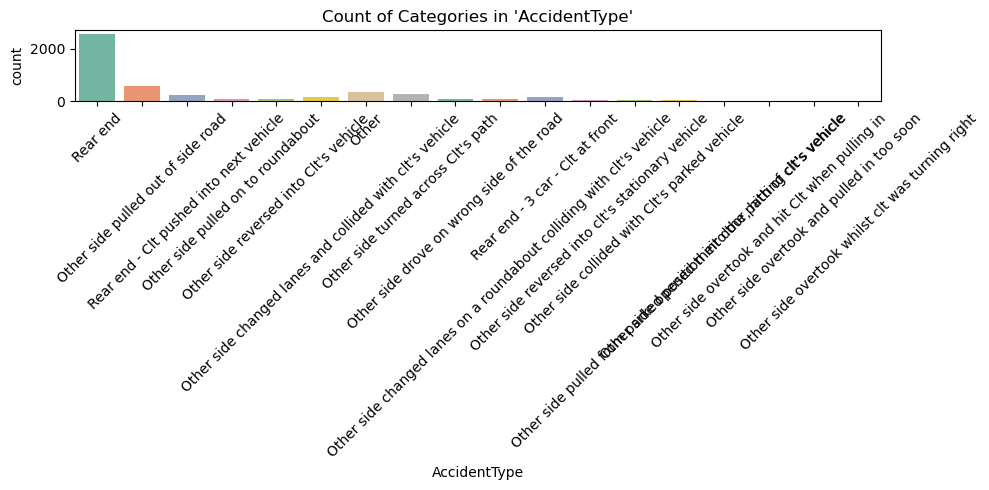

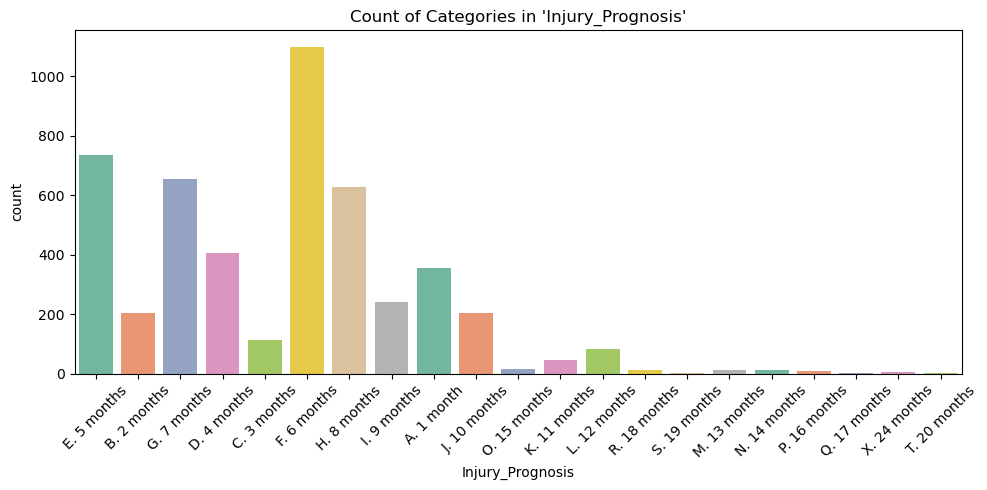

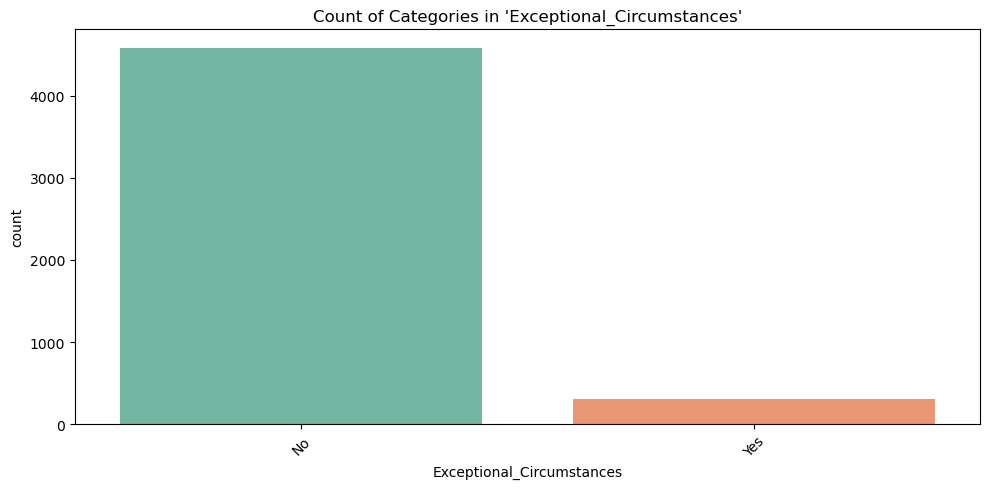

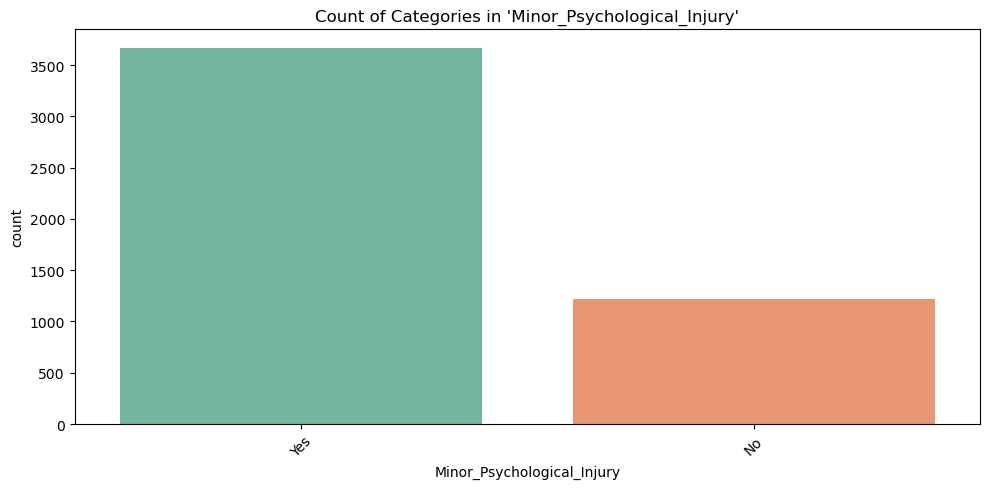

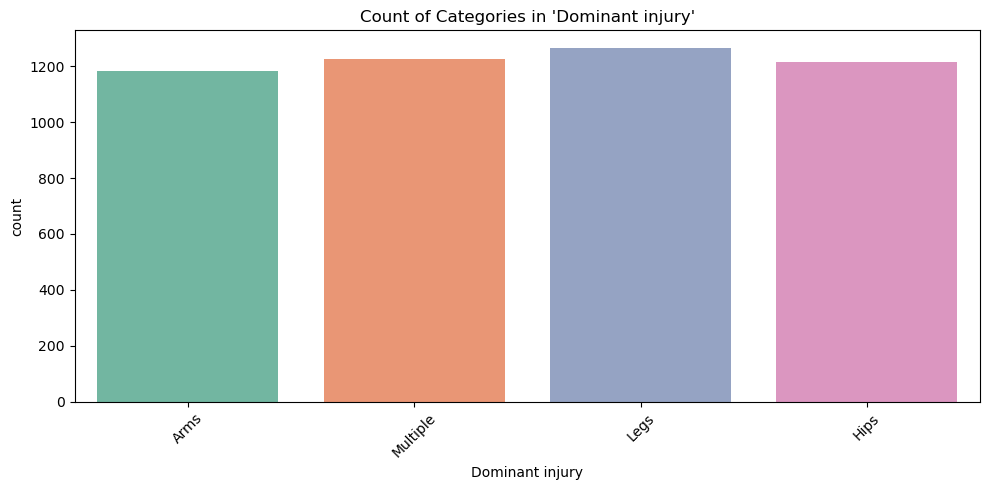

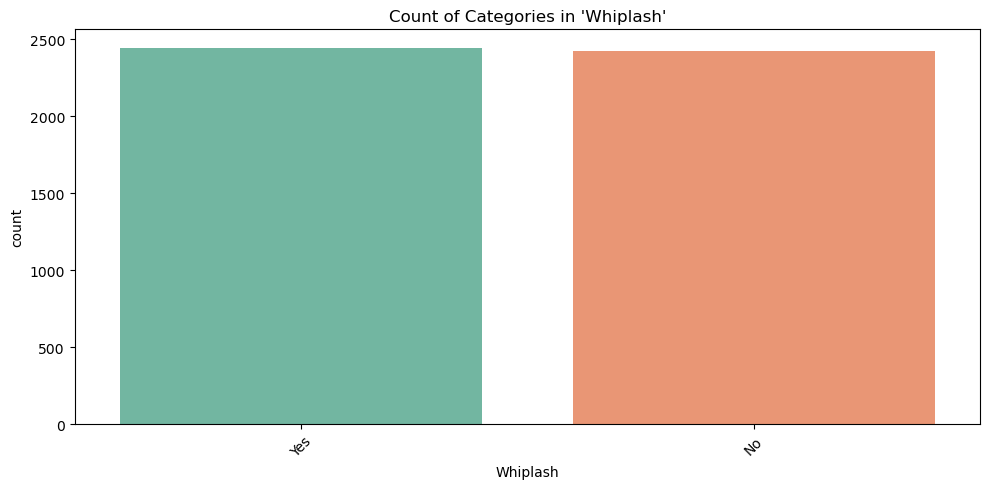

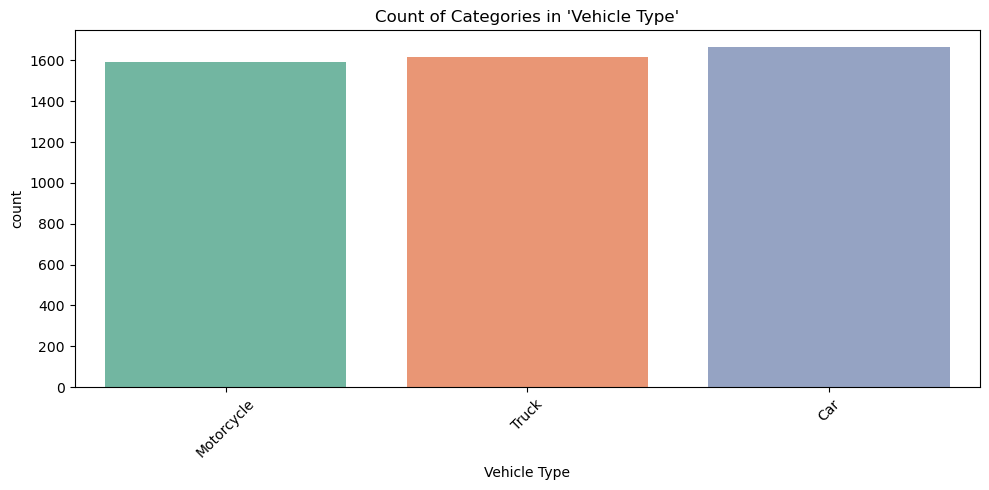

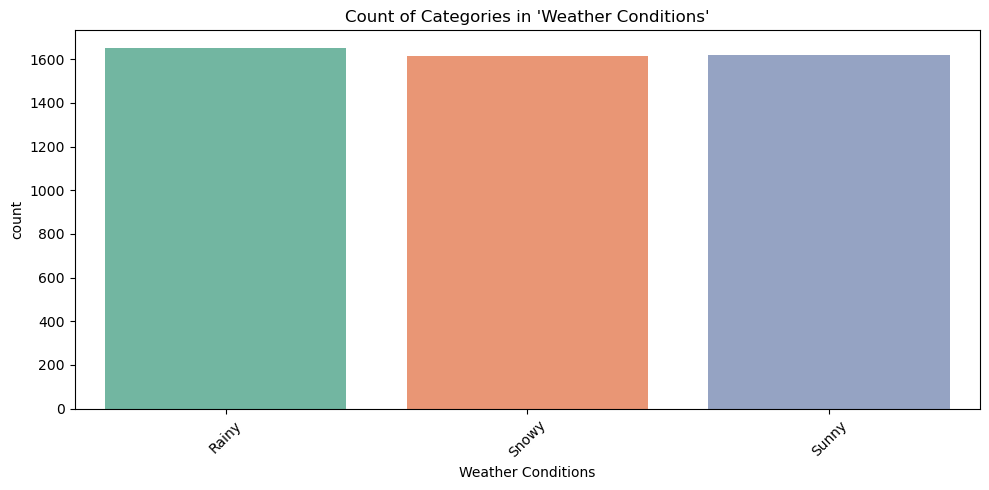

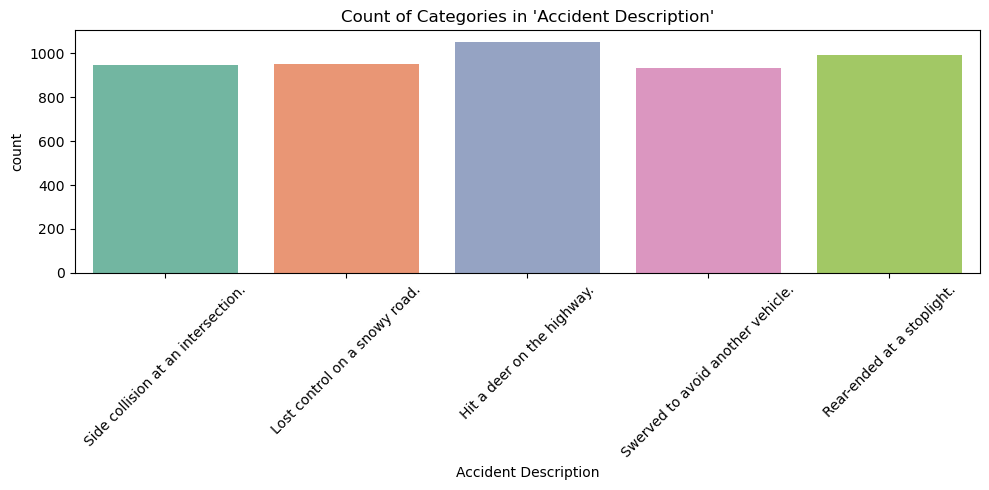

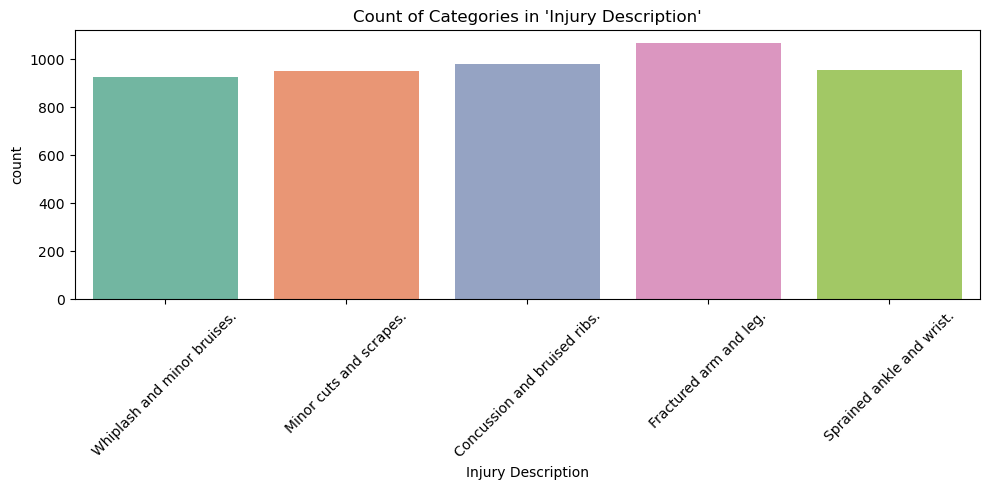

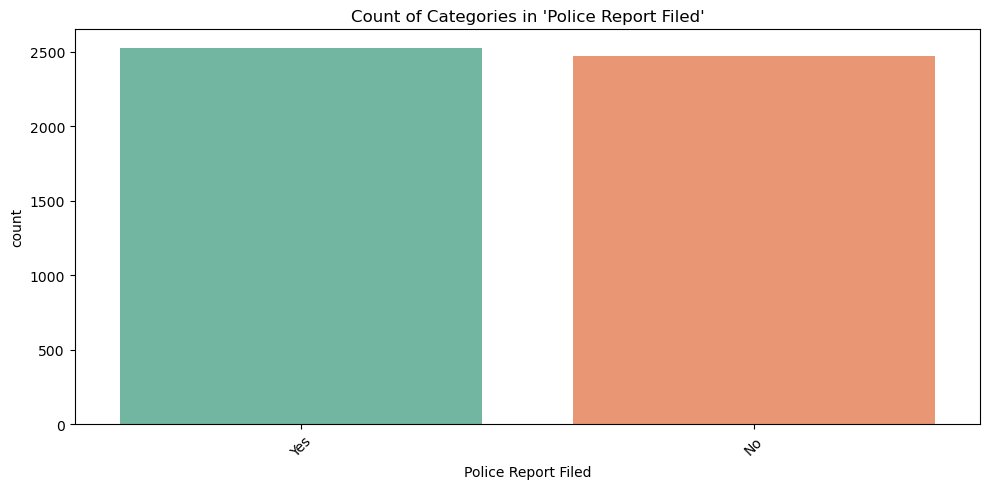

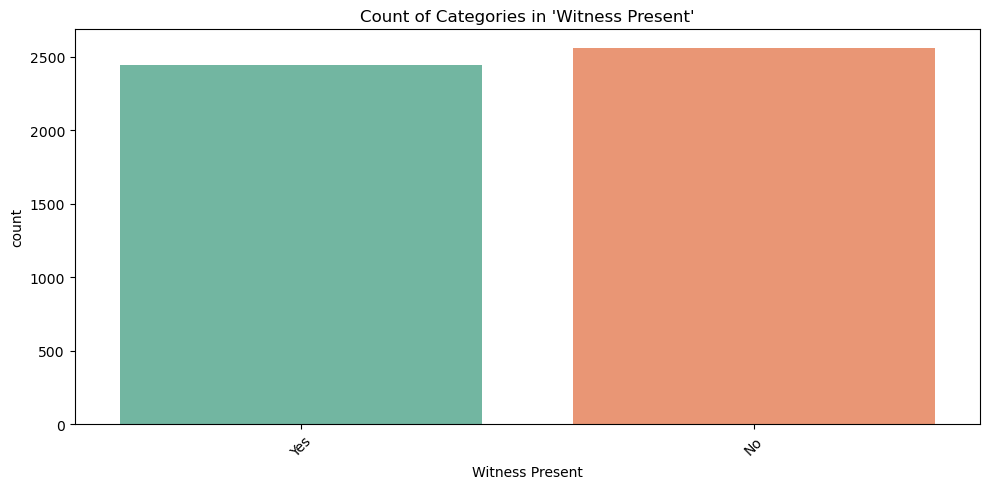

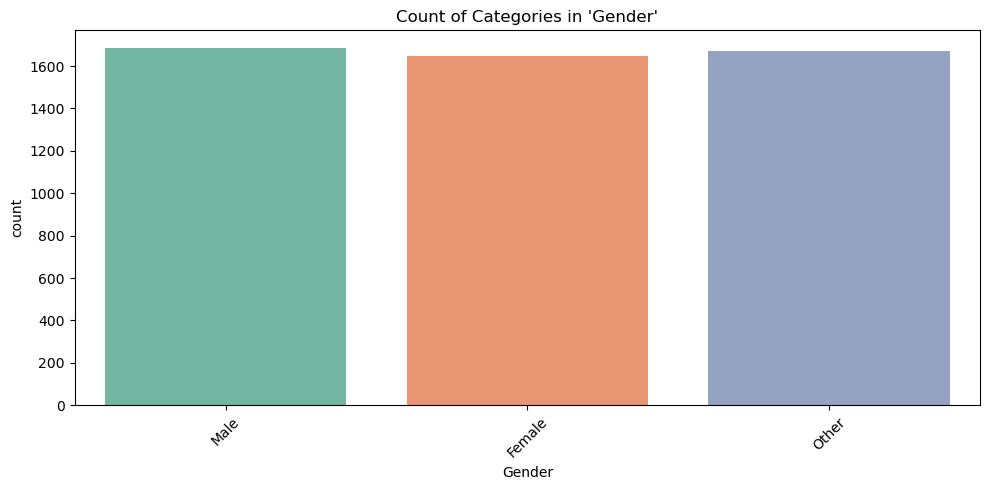

In [4]:
import seaborn as sns

categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() <= 30]

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f"Count of Categories in '{col}'")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [5]:
# Ensure you're selecting numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlations with SettlementValue
correlations = numeric_df.corr()['SettlementValue'].sort_values(ascending=False)

# Print
print("\n Correlation with SettlementValue:")
print(correlations)



📊 Correlation with SettlementValue:
SettlementValue            1.000000
GeneralRest                0.576297
GeneralFixed               0.534009
SpecialEarningsLoss        0.337202
SpecialTherapy             0.317249
SpecialAssetDamage         0.270252
SpecialTripCosts           0.158480
SpecialJourneyExpenses     0.131997
SpecialLoanerVehicle       0.131709
SpecialUsageLoss           0.129624
SpecialFixes               0.107880
GeneralUplift              0.095233
SpecialOverage             0.062656
SpecialHealthExpenses      0.024035
Driver Age                 0.017975
SpecialMedications         0.015797
SpecialAdditionalInjury    0.014341
SpecialRehabilitation     -0.008444
Vehicle Age               -0.013916
Number of Passengers      -0.014996
SpecialReduction                NaN
Name: SettlementValue, dtype: float64


In [6]:
for col in df.columns:
    print(f"\n Column: {col}")
    print(df[col].value_counts(dropna=True)) 
    print("-" * 50)



 Column: SettlementValue
SettlementValue
520.00     347
895.00     221
260.00     166
495.00     160
240.00     136
          ... 
4635.20      1
1531.76      1
3331.76      1
610.00       1
2440.00      1
Name: count, Length: 1022, dtype: int64
--------------------------------------------------

 Column: AccidentType
AccidentType
Rear end                                                                 2564
Other side pulled out of side road                                        570
Other                                                                     345
Other side turned across Clt's path                                       275
Rear end - Clt pushed into next vehicle                                   252
Other side changed lanes and collided with clt's vehicle                  188
Rear end - 3 car - Clt at front                                           154
Other side reversed into Clt's vehicle                                    100
Other side drove on wrong side of the road

In [7]:
missing = df.isnull().sum()
print("\nMissing Values:")
print(missing[missing > 0].sort_values(ascending=False))




Missing Values:
Injury_Prognosis              156
SpecialJourneyExpenses        147
SpecialLoanerVehicle          139
Accident Date                 138
GeneralUplift                 137
SpecialAdditionalInjury       134
SpecialTherapy                132
SpecialHealthExpenses         130
SpecialUsageLoss              130
SpecialMedications            130
Whiplash                      130
Driver Age                    129
GeneralRest                   128
SpecialEarningsLoss           128
Vehicle Age                   126
Vehicle Type                  126
AccidentType                  122
Number of Passengers          122
GeneralFixed                  121
SpecialFixes                  121
SpecialReduction              121
Accident Description          120
Injury Description            119
Minor_Psychological_Injury    119
SpecialOverage                117
SpecialRehabilitation         116
SpecialTripCosts              115
Weather Conditions            114
SpecialAssetDamage            1

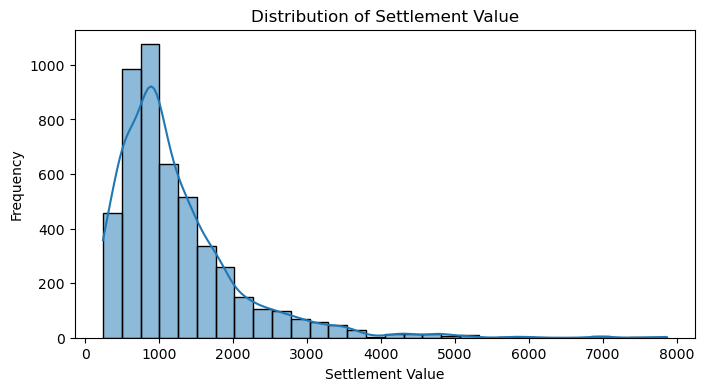

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df['SettlementValue'], kde=True, bins=30)
plt.title("Distribution of Settlement Value")
plt.xlabel("Settlement Value")
plt.ylabel("Frequency")
plt.show()


In [9]:

# # 1. Convert dates and compute claim delay
# df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
# df['Claim Date'] = pd.to_datetime(df['Claim Date'], errors='coerce')
# df['ClaimDelayDays'] = (df['Claim Date'] - df['Accident Date']).dt.days

# # 2. Drop irrelevant or text-heavy columns
# cols_to_drop = [
#     'SpecialReduction', 'Accident Description', 'Injury Description',
#     'Accident Date', 'Claim Date',
#     'SpecialRehabilitation', 'Police Report Filed',
#     'SpecialMedications', 'SpecialHealthExpenses',
#     'SpecialAdditionalInjury'
# ]
# df = df.drop(columns=cols_to_drop, errors='ignore')


# def extract_months(value):
#     try:
#         digits = ''.join(filter(str.isdigit, str(value)))
#         return int(digits) if digits else np.nan
#     except:
#         return np.nan

# df['Injury_Prognosis'] = df['Injury_Prognosis'].apply(extract_months)

# # 4. Encode binary Yes/No columns
# binary_columns = ["Exceptional_Circumstances", "Whiplash", "Witness Present"]
# for col in binary_columns:
#     if col in df.columns:
#         df[col] = df[col].map({"Yes": 1, "No": 0}).fillna(0)

# # 5. Define numerical and categorical columns
# numerical_cols = [
#     'GeneralRest', 'Number of Passengers', 'GeneralFixed', 'SpecialEarningsLoss',
#     'SpecialTherapy', 'SpecialAssetDamage', 'SpecialTripCosts',
#     'SpecialJourneyExpenses', 'SpecialLoanerVehicle', 'SpecialUsageLoss',
#     'SpecialFixes', 'GeneralUplift', 'SpecialOverage', 'Driver Age',
#     'Injury_Prognosis', 'ClaimDelayDays', 'Vehicle Age'
# ]

# categorical_cols = [
#     'AccidentType', 'Dominant injury', 'Vehicle Type', 'Weather Conditions', 'Gender',
#     'Minor_Psychological_Injury'
# ]

# #num_imputer = SimpleImputer(strategy='most_frequent')
# num_imputer = SimpleImputer(strategy='median')
# df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# # Categorical with mode
# for col in categorical_cols:
#     df[col] = df[col].fillna(df[col].mode()[0])

# # 7. Drop rows with missing target
# df = df.dropna(subset=['SettlementValue'])

# # 8. One-hot encode categorical columns
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# # 9. Scale numerical features
# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
# 1. Convert dates and compute claim delay
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['Claim Date'] = pd.to_datetime(df['Claim Date'], errors='coerce')
df['ClaimDelayDays'] = (df['Claim Date'] - df['Accident Date']).dt.days

# 2. Drop irrelevant or text-heavy columns
cols_to_drop = [
    'SpecialReduction', 'Accident Description', 'Injury Description',
    'Accident Date', 'Claim Date',
    'SpecialRehabilitation', 'Police Report Filed',
    'SpecialMedications', 'SpecialHealthExpenses',
    'SpecialAdditionalInjury'
]
df = df.drop(columns=cols_to_drop, errors='ignore')

# 3. Injury prognosis to months
def extract_months(value):
    try:
        digits = ''.join(filter(str.isdigit, str(value)))
        return int(digits) if digits else np.nan
    except:
        return np.nan
df['Injury_Prognosis'] = df['Injury_Prognosis'].apply(extract_months)

# 4. Encode binary Yes/No columns
binary_columns = ["Exceptional_Circumstances", "Whiplash", "Witness Present"]
for col in binary_columns:
    if col in df.columns:
        df[col] = df[col].map({"Yes": 1, "No": 0}).fillna(0)

# ------------------------
#  FEATURE ENGINEERING
# ------------------------

# A. Total special cost features combined
df['TotalSpecialCosts'] = df[
    ['SpecialEarningsLoss', 'SpecialTherapy', 'SpecialAssetDamage',
     'SpecialTripCosts', 'SpecialJourneyExpenses', 'SpecialLoanerVehicle',
     'SpecialUsageLoss', 'SpecialFixes', 'SpecialOverage']
].sum(axis=1)

# B. Driver age groups
df['DriverAge_Bucket'] = pd.cut(df['Driver Age'], bins=[0, 25, 45, 65, 100], labels=['<25', '25-45', '45-65', '65+'])

# C. Vehicle age groups
df['VehicleAge_Bucket'] = pd.cut(df['Vehicle Age'], bins=[-1, 5, 10, 20, 100], labels=['0-5', '6-10', '11-20', '20+'])

# D. Injury severity levels from prognosis
df['Injury_Severity_Level'] = pd.cut(df['Injury_Prognosis'],
                                     bins=[-1, 3, 6, 12, 60],
                                     labels=['Low', 'Medium', 'High', 'Very High'])

# E. Claim filing speed
df['ClaimSpeedCategory'] = pd.cut(df['ClaimDelayDays'],
                                  bins=[-10, 5, 15, 30, 999],
                                  labels=['Immediate', 'Fast', 'Normal', 'Late'])

# F. Interaction feature: Driver age * vehicle age
df['Driver_Vehicle_Interaction'] = df['Driver Age'] * df['Vehicle Age']

# 5. Update numerical and categorical columns
numerical_cols = [
    'GeneralRest', 'Number of Passengers', 'GeneralFixed', 'SpecialEarningsLoss',
    'SpecialTherapy', 'SpecialAssetDamage', 'SpecialTripCosts',
    'SpecialJourneyExpenses', 'SpecialLoanerVehicle', 'SpecialUsageLoss',
    'SpecialFixes', 'GeneralUplift', 'SpecialOverage', 'Driver Age',
    'Injury_Prognosis', 'ClaimDelayDays', 'Vehicle Age',
    'TotalSpecialCosts', 'Driver_Vehicle_Interaction'
]

categorical_cols = [
    'AccidentType', 'Dominant injury', 'Vehicle Type', 'Weather Conditions', 'Gender',
    'Minor_Psychological_Injury', 'DriverAge_Bucket', 'VehicleAge_Bucket',
    'Injury_Severity_Level', 'ClaimSpeedCategory'
]

# 6. Impute missing numeric values
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# 7. Impute missing categoricals with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 8. Drop missing targets
df = df.dropna(subset=['SettlementValue'])

# 9. One-hot encode categoricals
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 10. Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [10]:
missing = df.isnull().sum()
print("\nMissing Values:")
print(missing[missing > 0].sort_values(ascending=False))


Missing Values:
Series([], dtype: int64)


In [11]:

# Split data
X = df.drop(columns=['SettlementValue'])
y = df['SettlementValue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# ---------------------------
# Random Forest with GridSearch
# ---------------------------
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

# ---------------------------
# Gradient Boosting with GridSearch
# ---------------------------
# gbr = GradientBoostingRegressor(random_state=42)
# gbr_params = {
#     'n_estimators': [50, 100],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5],
#     'min_samples_split': [2, 5]
# }
# gbr_grid = GridSearchCV(gbr, gbr_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# gbr_grid.fit(X_train, y_train)
# gbr_best = gbr_grid.best_estimator_

gbr = GradientBoostingRegressor()

param_dist = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

random_search = RandomizedSearchCV(
    gbr,
    param_distributions=param_dist,
    n_iter=20,  # fewer iterations = faster
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
gbr_best = random_search.best_estimator_
#---------------stacking---------------------
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Define base learners
base_learners = [
    ('lr', LinearRegression()),
    ('rf', rf_best),
    ('gbr', gbr_best)
]

# Meta learner
meta_model = Ridge(alpha=1.0)

# Stacking ensemble
stacking_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Fit stacking model
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)

# Evaluate Stacking
mae = mean_absolute_error(y_test, y_pred_stack)
mse = mean_squared_error(y_test, y_pred_stack)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_stack)
mape = np.mean(np.abs((y_test - y_pred_stack) / y_test)) * 100

print(f"\n --- Stacking Regressor ---")
print(f"Mean Absolute Error (MAE): £{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
#---------------stacking---------------------

# # 5. Define models
# models = {
#     'Linear Regression': LinearRegression(),
#     'Random Forest (Tuned)': rf_best,
#     'Gradient Boosting (Tuned)': gbr_best
# }
    


# # Evaluation
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)
#     mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#     print(f"\n --- {name} ---")
#     print(f"Mean Absolute Error (MAE): £{mae:.2f}")
#     print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#     print(f"R² Score: {r2:.4f}")
#     print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")




Fitting 3 folds for each of 20 candidates, totalling 60 fits

📊 --- Stacking Regressor ---
Mean Absolute Error (MAE): £117.53
Root Mean Squared Error (RMSE): 216.72
R² Score: 0.9379
Mean Absolute Percentage Error (MAPE): 9.84%


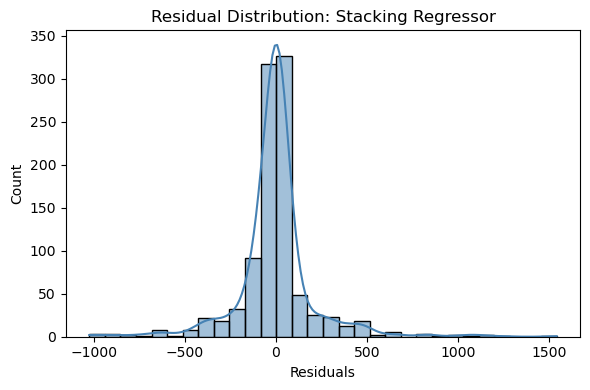

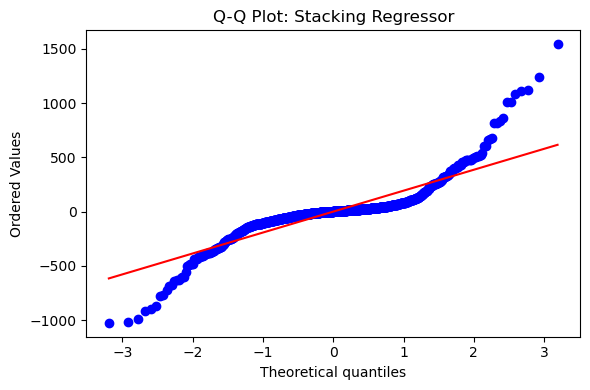

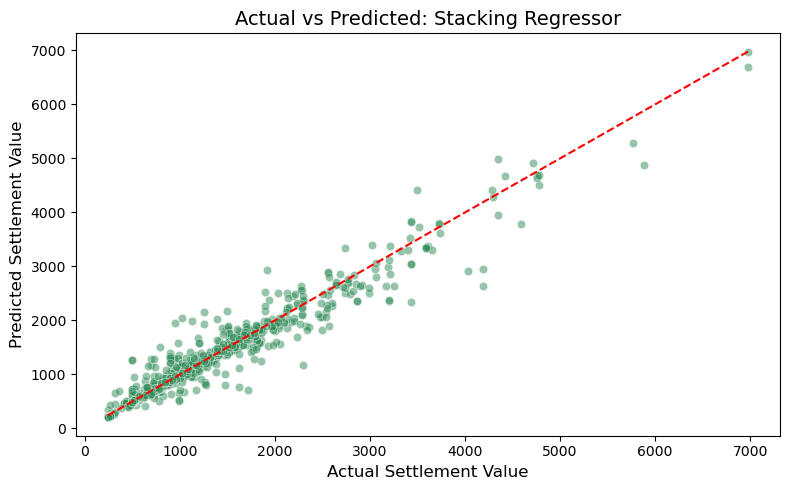

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


#  for name, model in models.items():
#     # Predict
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     residuals = y_test - y_pred

#     # Residual Distribution
#     plt.figure(figsize=(6, 4))
#     sns.histplot(residuals, kde=True, bins=30, color="steelblue")
#     plt.title(f"Residual Distribution: {name}")
#     plt.xlabel("Residuals")
#     plt.tight_layout()
#     plt.show()

#     # Q-Q Plot
#     plt.figure(figsize=(6, 4))
#     stats.probplot(residuals, dist="norm", plot=plt)
#     plt.title(f"Q-Q Plot: {name}")
#     plt.tight_layout()
#     plt.show()

#     # Actual vs Predicted
#     plt.figure(figsize=(8, 5))
#     sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='seagreen')
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
#     plt.xlabel("Actual Settlement Value", fontsize=12)
#     plt.ylabel("Predicted Settlement Value", fontsize=12)
#     plt.title(f"Actual vs Predicted: {name}", fontsize=14)
#     plt.tight_layout()
#     plt.show()

y_pred = stacking_model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30, color="steelblue")
plt.title("Residual Distribution: Stacking Regressor")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

# 📈 Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot: Stacking Regressor")
plt.tight_layout()
plt.show()

# 📉 Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='seagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Settlement Value", fontsize=12)
plt.ylabel("Predicted Settlement Value", fontsize=12)
plt.title("Actual vs Predicted: Stacking Regressor", fontsize=14)
plt.tight_layout()
plt.show()